In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [6]:
from itertools import product
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

hyperparam = {'cost': [.001,.01,.1,1,10], 
              'gamma': [.001,.01,.1,1,10]}
hyperparam = expand_grid(hyperparam)

gamma_range = pd.Series(hyperparam['gamma']).values
C_range = pd.Series(hyperparam['cost']).values
param_grid = dict(gamma=gamma_range,C=C_range)

In [7]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data = data.drop(['url', ' timedelta'], axis=1)
data = data.head(n=15000) #In case the instructor wants to check the code change the number
data[' shares'] = np.where(data[' shares']>=1400,1,0)

In [8]:
y = data[' shares']
X = data.drop([' shares'], axis=1)
X = (X-X.mean())/(X.max()-X.min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)
#X_train = X_train.drop([' shares'], axis=1)
#X_train = X_train-X_train.mean()/(X_train.max()-X_train.min())
#X_test = X_test.drop([' shares'], axis=1)
#X_test = X_test-X_test.mean()/(X_test.max()-X_test.min())

In [9]:
t0 = time.time()
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
     % (grid.best_params_, grid.best_score_))
scores1 = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

The best parameters are {'C': 10.0, 'gamma': 0.1} with a score of 0.63


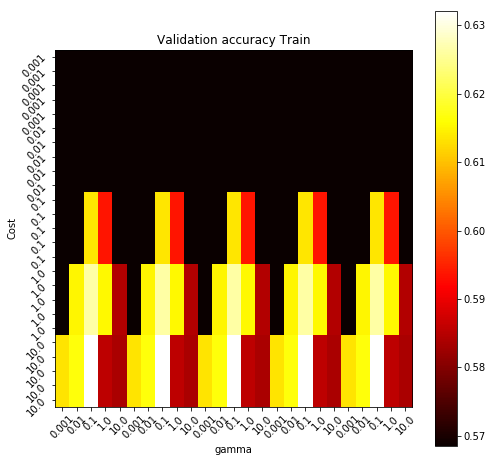

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(scores1, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('Cost')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range,rotation=45)
plt.title('Validation accuracy Train ')
plt.show()

In [11]:

clf = SVC()
clf.fit(X_train,y_train)
SVC(C=grid.best_params_['C'], cache_size=200,gamma=grid.best_params_['gamma'], kernel='rbf')
pred = clf.predict(X_test)
ans = accuracy_score(y_test,pred)
diff = (ans-grid.best_score_)*100
diff


-1.014285714285712